In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import h5py

import matplotlib.pyplot as plt
from skimage import filters
import pickle

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from scipy.optimize import lsq_linear
def unmixing(features, cell, n_feature):
    b = features['ave_intensity'].loc[cell][: n_feature] 
    wls = features['wavelengths'].loc[cell][: n_feature]

    A = np.empty((len(b), len(mols)))
    for wl in wls:
        for i, mol in enumerate(mols):
            j = [j for j, col in enumerate(dfs[mol].columns[:-1]) 
                 if (dfs[mol].columns[j] <= wl[0] < dfs[mol].columns[j+1])][0]
            if wl[0] - dfs[mol].columns[j] > dfs[mol].columns[j + 1]- wl[0]:
                j += 1
            ex = dfs[mol].columns[j]

            k = [k for k, idx in enumerate(dfs[mol].index[:-1]) 
                 if (dfs[mol].index[k] > wl[1] >= dfs[mol].index[k+1])][0]
            if dfs[mol].index[k] - wl[1] < wl[1] - dfs[mol].index[k + 1]:
                k += 1
            em = dfs[mol].index[k]

            A[wls.index(wl), i] = dfs[mol].at[em, ex]
    res = lsq_linear(A, b, bounds=(0, np.inf), method='trf')

    return res

In [3]:
fdn_save = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/background_subtraction/'
with open(fdn_save + 'bkg_sub_features.pkl','rb') as f:
    features = pickle.load(f)
features = features.set_index('image')

In [103]:
mols = ['Free NAD(P)H', 'Protein bound NAD(P)H', 'Lipofuscion',] # lipofusionA

fdn = '/home/yike/phd/cancer_cells_img_seq/scripts/spetra_matrixs/matrix_data_range/'
dfs = {name: pd.read_csv(fdn + name.replace(' ', '_') + '.tsv', sep='\t', index_col=0) for name in mols}

for mol in mols:
    dfs[mol].index = dfs[mol].index.astype('float')
    dfs[mol].columns = dfs[mol].columns.astype('float')

In [114]:
n_feature = 7

abundance = pd.DataFrame([], columns=mols)
for cell in features.index:
    abundance.loc[cell] = unmixing(features, cell, n_feature)['x']

In [181]:
abundance.to_csv('/home/yike/phd/cancer_cells_img_seq/data/unmixing/abundance.tsv', sep='\t')

# use Abbas features

In [4]:
abbs = pd.read_csv('/home/yike/phd/cancer_cells_img_seq/data/Abbas_features/YiKe2.tsv', sep='\t', index_col=0)
abbs_feas = abbs[abbs.columns[:15]]

In [15]:
idx = abbs_feas.index.tolist()
idx.remove('D6_S41')

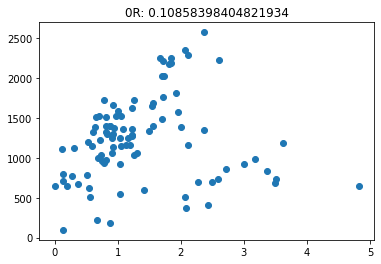

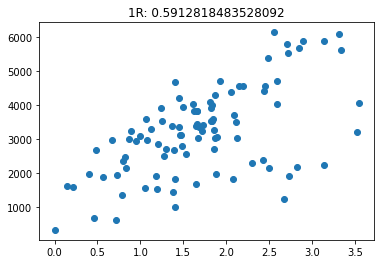

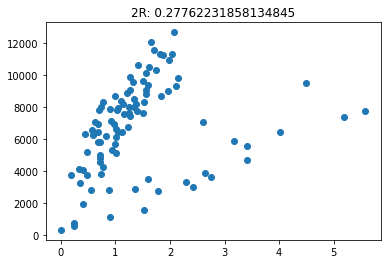

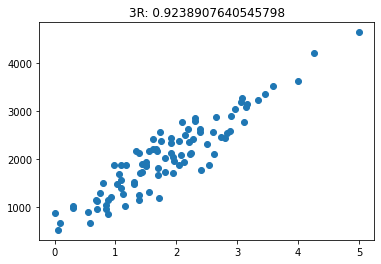

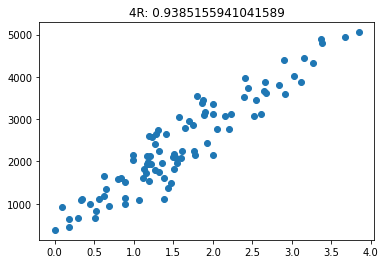

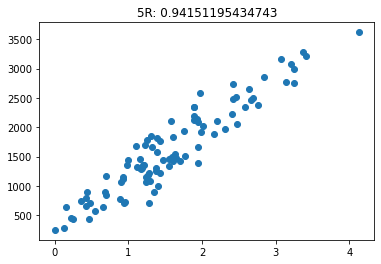

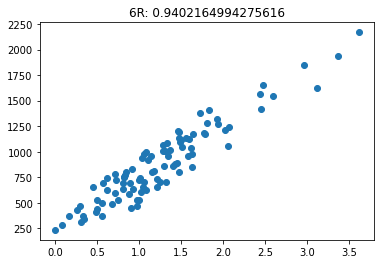

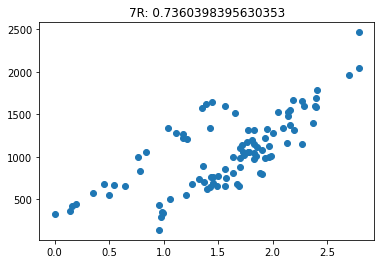

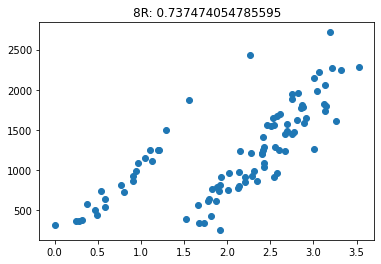

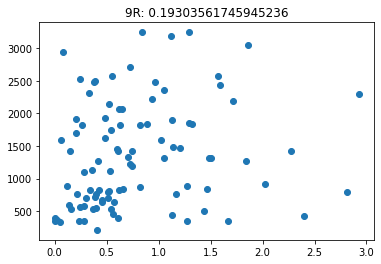

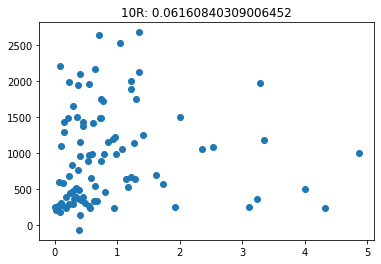

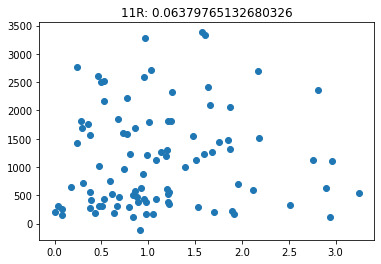

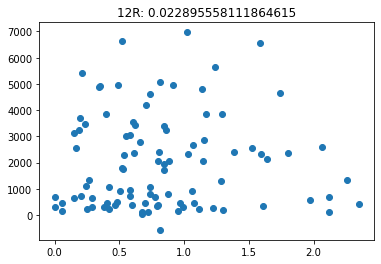

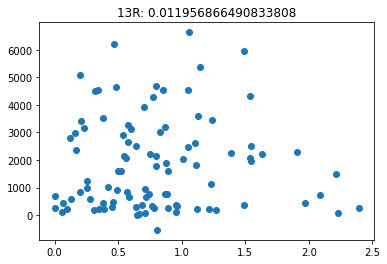

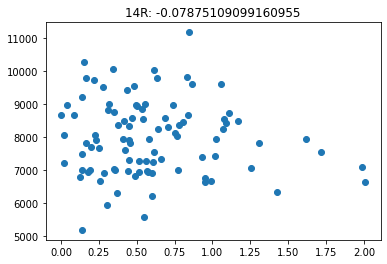

In [20]:
# subtracted features vs abbs
from scipy.stats import pearsonr
for fea_i in range(15):
    fig, ax = plt.subplots()
    x = abbs.loc[idx][abbs.columns[fea_i]]
    y = [i[fea_i] for i in features.loc[idx]['ave_intensity']]
    ax.scatter(x, y)
    ax.set_title(str(fea_i) + 'R: {}'.format(str(pearsonr(x, y)[0])))

<ipython-input-206-e85fd807c0f2>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  abbs = abbs.loc[idxs]
<ipython-input-206-e85fd807c0f2>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_old = features_old.loc[idxs]


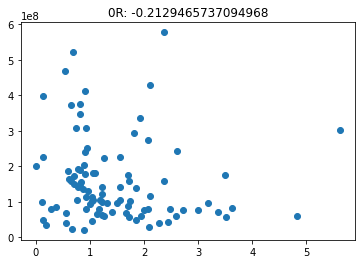

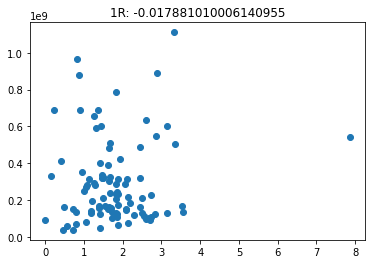

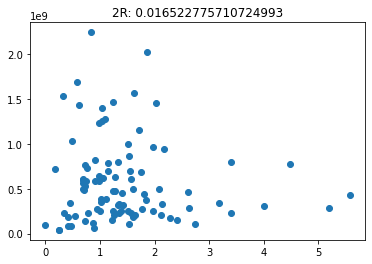

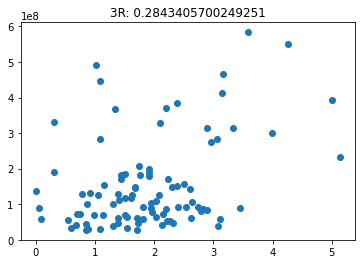

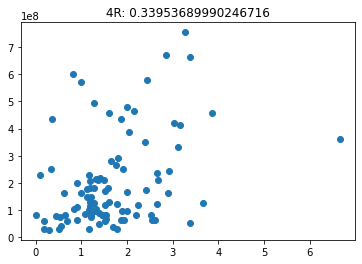

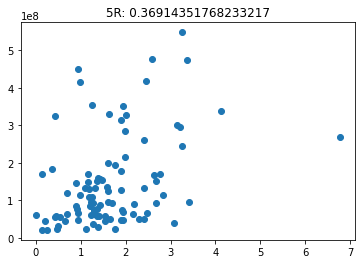

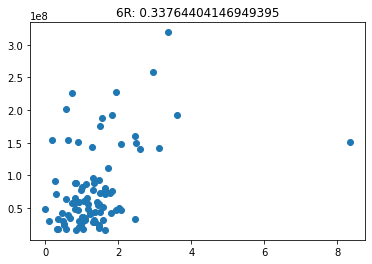

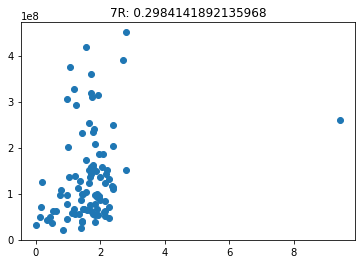

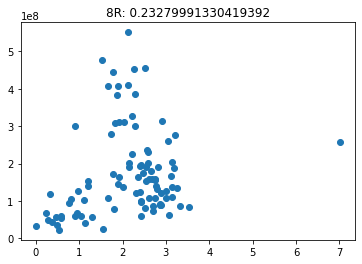

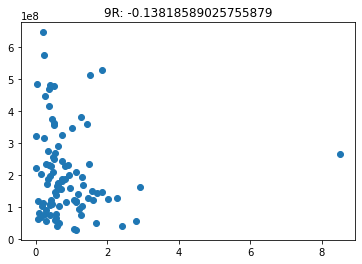

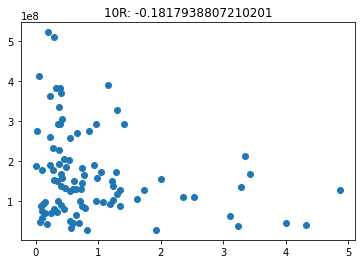

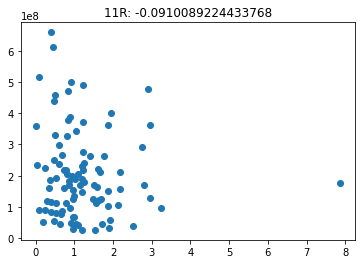

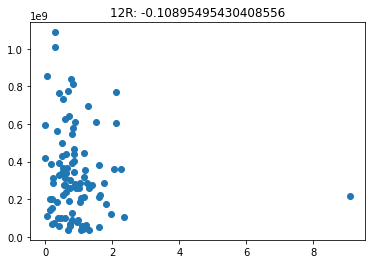

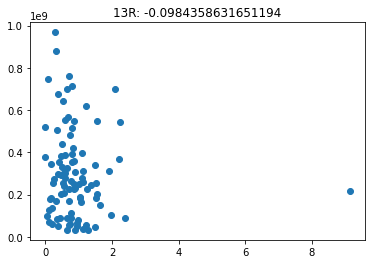

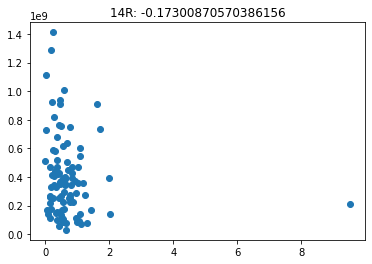

In [206]:
# Abbas's features are after background subtraction
if False:
    with open ('/home/yike/phd/cancer_cells_img_seq/data/features.pkl', 'rb') as f:
        features_old = pickle.load(f)

    # unsubtracted features vs abbs
    from scipy.stats import pearsonr
    idxs = set(abbs.index) & set(features_old.index)
    abbs = abbs.loc[idxs]
    features_old = features_old.loc[idxs]
    for fea_i in range(15):
        fig, ax = plt.subplots()
        x = abbs[abbs.columns[fea_i]]
        y = [i[fea_i] for i in features_old['spectrum']]
        ax.scatter(x, y)
        ax.set_title(str(fea_i) + 'R: {}'.format(str(spearmanr(x, y)[0])))

In [192]:
corrs = []
for i in range(153):
    x = abbs[abbs.columns[i]]
    y = abbs[abbs.columns[10]]
    corrs.append(spearmanr(x, y)[0])

In [194]:
corrs

[0.9707948996201845,
 0.8721513836136734,
 0.9745252306022789,
 0.378784590341834,
 0.2899891481280521,
 0.30865436787845907,
 0.35599565925122084,
 0.18071079761258815,
 0.17928648941942488,
 0.9675935973955507,
 1.0,
 0.862913727618014,
 0.8216223548562127,
 0.8240504612045578,
 0.857813347802496,
 0.5115979381443299,
 0.3484943027672273,
 0.9675935973955507,
 0.9778350515463917,
 0.6698996201844818,
 0.601695604991861,
 0.5942892023874118,
 0.66587086272382,
 0.40208898534997284,
 0.2930819316332067,
 1.0,
 0.9778350515463917,
 0.8831524688008682,
 0.8244981009224092,
 0.8202387411828541,
 0.8628323385784047,
 0.5328269126424308,
 0.3657216494845361,
 0.862913727618014,
 0.6698996201844818,
 0.8831524688008682,
 0.33286760716223546,
 0.35628052088985346,
 0.3860824742268041,
 0.25420510037981553,
 0.22581389039609331,
 0.8216223548562127,
 0.601695604991861,
 0.8244981009224092,
 0.33286760716223546,
 0.31132664134563215,
 0.33422409115572443,
 0.22786218122626153,
 0.21081117742810

In [203]:
features_old

,area,length,width,eccentricity,spectrum,image,cell,wavelengths,doublets,#cells
sample,,,,,,,,,,
G12_S122,72727,328,329,0.996960,"[202544595.0, 389410365.0, 782237356.0, 185911...",dish3_L7,2,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0
C8_S66,51244,264,272,0.970588,"[79835753.0, 127809977.0, 251870792.0, 5216057...",dish3_L7,3,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0
D8_S67,40847,259,301,0.860465,"[70895802.0, 129865423.0, 225925327.0, 5813336...",dish3_L7,4,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0
F8_S69,40740,231,239,0.966527,"[40444555.0, 69445328.0, 88961579.0, 40299692....",dish3_L7,5,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0
O7_S65,37955,267,224,1.191964,"[76566613.0, 126475187.0, 335264154.0, 5696080...",dish3_L7,6,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,2.0
...,...,...,...,...,...,...,...,...,...,...
L3_S10,122403,439,393,1.117048,"[307847014.0, 589972985.0, 1255036149.0, 28293...",dish1_P9,2,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0
M3_S11,32057,213,230,0.926087,"[35369725.0, 58617807.0, 87706062.0, 29066682....",dish1_P9,6,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0
N5_S38,191567,528,558,0.946237,"[410725420.0, 789043469.0, 1462959699.0, 46641...",dish2_U7,1,"[(325, 414), (343, 414), (370, 414), (343, 451...",No,1.0


In [175]:
mols = ['Free NAD(P)H', 'Protein bound NAD(P)H', 'FAD', 'Lipofuscion',] # lipofusionA

fdn = '/home/yike/phd/cancer_cells_img_seq/scripts/spetra_matrixs/matrix_data_range/'
dfs = {name: pd.read_csv(fdn + name.replace(' ', '_') + '.tsv', sep='\t', index_col=0) for name in mols}

for mol in mols:
    dfs[mol].index = dfs[mol].index.astype('float')
    dfs[mol].columns = dfs[mol].columns.astype('float')

In [177]:
from scipy.optimize import lsq_linear
def unmixing_abbs(features, abbs_feas, cell):
    b = abbs_feas.loc[cell]
    wls = features['wavelengths'].loc[cell]

    A = np.empty((len(b), len(mols)))
    for wl in wls:
        for i, mol in enumerate(mols):
            j = [j for j, col in enumerate(dfs[mol].columns[:-1]) 
                 if (dfs[mol].columns[j] <= wl[0] < dfs[mol].columns[j+1])][0]
            if wl[0] - dfs[mol].columns[j] > dfs[mol].columns[j + 1]- wl[0]:
                j += 1
            ex = dfs[mol].columns[j]

            k = [k for k, idx in enumerate(dfs[mol].index[:-1]) 
                 if (dfs[mol].index[k] > wl[1] >= dfs[mol].index[k+1])][0]
            if dfs[mol].index[k] - wl[1] < wl[1] - dfs[mol].index[k + 1]:
                k += 1
            em = dfs[mol].index[k]

            A[wls.index(wl), i] = dfs[mol].at[em, ex]
    res = lsq_linear(A, b, bounds=(0, np.inf), method='trf')

    return res

In [178]:
abundance_abbs = pd.DataFrame([], columns=mols)
for cell in abbs_feas.index:
    abundance_abbs.loc[cell] = unmixing_abbs(features, abbs_feas, cell)['x']

In [182]:
abundance_abbs.to_csv('/home/yike/phd/cancer_cells_img_seq/data/unmixing/abundance_abbs.tsv', sep='\t')